# Get to know the networkx-library

## Simple graph creation

In [2]:
import networkx as nx

In [2]:
# Initializes a graph
G = nx.Graph()

# Manually setting vertices, edges ...
G.add_node('Y')
G.add_node('Z')
G.add_edge('Y','Z')

# Clear the existing structure
G.clear()
G.number_of_nodes(), G.number_of_edges()

(0, 0)

In [3]:
# Set multiple at once
G.add_nodes_from(['A', 'B', 'C', 'D', 'E'])
G.add_edges_from([('A','B'), ('C','E'), ('E','B'), ('D','A'), ('D','B'), ('C','D')])

G.add_node('ONE') # One vertice: ONE
G.add_nodes_from('ONE') # 3 vertices

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

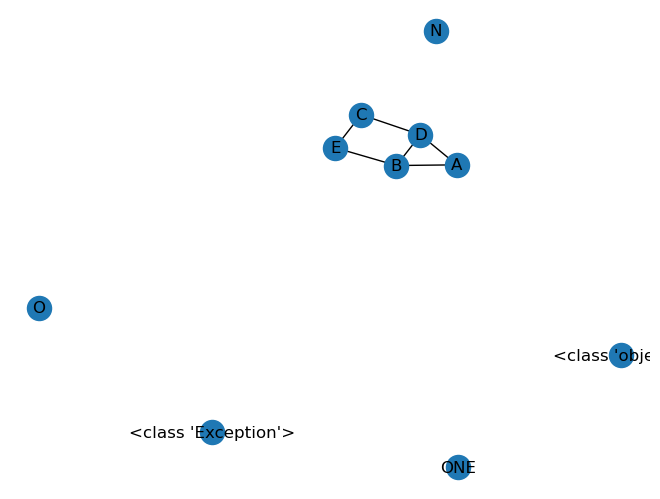

In [5]:
# Set any object (hashable) as vertex in networkx

G.add_node(object)
G.add_node(Exception)

nx.draw(G,with_labels='True')

# Use convert_node_labels_to_integers() for easy and safe conversion

In [6]:
print(G.nodes, G.edges)

# Edges can have attributes
G['A']['B']['weight'] = '40'

try: # This raises Key Error since edge not there
    G['N']['B']['color'] = 'yellow' 
except KeyError as e:
    print('Error: ', type(e))
        
G['A']['D']['year'] = 2001 # This edge exists
print(G.nodes, G.edges)
print(G['A']['D'])

['A', 'B', 'C', 'D', 'E', 'ONE', 'O', 'N', <class 'object'>, <class 'Exception'>] [('A', 'B'), ('A', 'D'), ('B', 'E'), ('B', 'D'), ('C', 'E'), ('C', 'D')]
Error:  <class 'KeyError'>
['A', 'B', 'C', 'D', 'E', 'ONE', 'O', 'N', <class 'object'>, <class 'Exception'>] [('A', 'B'), ('A', 'D'), ('B', 'E'), ('B', 'D'), ('C', 'E'), ('C', 'D')]
{'year': 2001}


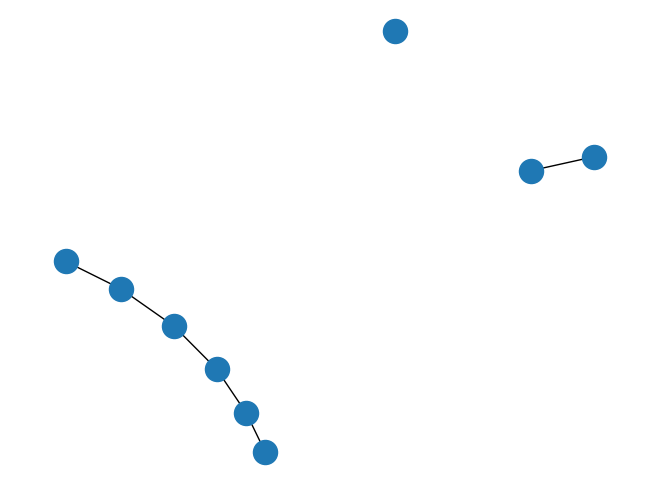

In [7]:
# Creates a 'line graph' with max 2 edges on one node
H = nx.path_graph(10)
H.remove_node(2)
H.remove_edge(3,4)
nx.draw(H)

In [8]:
# This shows all elements of the graph
H.edges, H.nodes

(EdgeView([(0, 1), (4, 5), (5, 6), (6, 7), (7, 8), (8, 9)]),
 NodeView((0, 1, 3, 4, 5, 6, 7, 8, 9)))

In [9]:
# Regarding weights ...
G.clear()

G.add_weighted_edges_from([(1, 2, 0.125), (1, 3, 0.75), (2, 4, 1.2), (3, 4, 0.375)])

# Always useful 
G.adj.items()

ItemsView(AdjacencyView({1: {2: {'weight': 0.125}, 3: {'weight': 0.75}}, 2: {1: {'weight': 0.125}, 4: {'weight': 1.2}}, 3: {1: {'weight': 0.75}, 4: {'weight': 0.375}}, 4: {2: {'weight': 1.2}, 3: {'weight': 0.375}}}))

In [10]:
# Use G.adj.items() 
for n, nbrs in G.adj.items():
    for nbr, eattr in nbrs.items():
        wt = eattr['weight']
        if wt < 0.5: print(f"({n}, {nbr}, {wt:.3})")

(1, 2, 0.125)
(2, 1, 0.125)
(3, 4, 0.375)
(4, 3, 0.375)


In [11]:
# Or G.adjacency()
for key, val in G.adjacency():
    print(val.keys(), val.values())

dict_keys([2, 3]) dict_values([{'weight': 0.125}, {'weight': 0.75}])
dict_keys([1, 4]) dict_values([{'weight': 0.125}, {'weight': 1.2}])
dict_keys([1, 4]) dict_values([{'weight': 0.75}, {'weight': 0.375}])
dict_keys([2, 3]) dict_values([{'weight': 1.2}, {'weight': 0.375}])


## Graph Classes

{('Caen', 'Paris'): Text(0.11111111111111116, -0.3333333333333333, '124.8'),
 ('Paris', 'Lyon'): Text(0.5555555555555556, 0.11111111111111113, '441.4'),
 ('Dijon', 'Lyon'): Text(-0.1111111111111111, 0.33333333333333337, '211.0'),
 ('Lyon', 'Paris'): Text(0.5555555555555556, 0.11111111111111113, '179.8'),
 ('Lyon', 'Dijon'): Text(-0.1111111111111111, 0.33333333333333337, '512.1')}

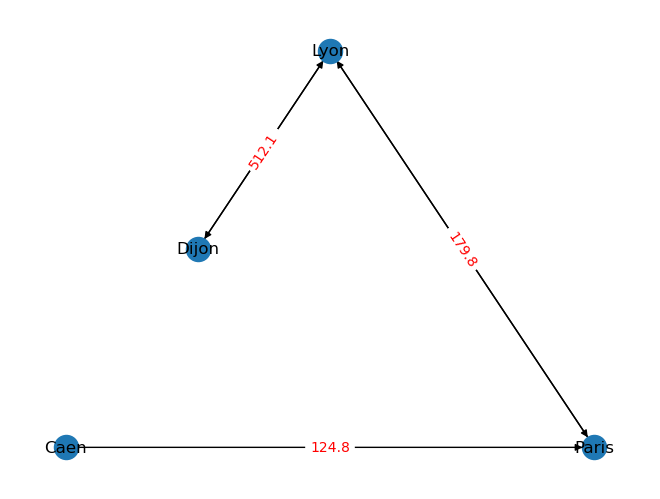

In [12]:
import matplotlib.pyplot as plt
# Multiple Graph

MG = nx.MultiDiGraph() # Multiple edges between 2 nodes allowed, self directed edges allowed

MG.add_nodes_from(['Caen','Paris','Dijon','Lyon'])

MG.add_weighted_edges_from([('Lyon','Paris', 179.8), ('Paris', 'Lyon', 441.4), ('Lyon', 'Dijon', 512.1), ('Dijon', 'Lyon', 211.0), ('Caen', 'Paris', 124.8)])

pos = nx.planar_layout(MG)
edges_weighted = {(u,v): f"{d['weight']}" for u,v,d in MG.edges(data=True)}

# print(MG['Paris']) -> {'Lyon': {0: {'weight': 179.8}, 1: {'weight': 441.4}}, 'Caen': {0: {'weight': 124.8}}}

nx.draw(MG, pos, with_labels='True')
nx.draw_networkx_edge_labels(MG, pos, edge_labels = edges_weighted, font_size = 10,font_color='red')


In [13]:
MG.edges(data=True)

# This requires fixing as not all edges are visible

OutMultiEdgeDataView([('Caen', 'Paris', {'weight': 124.8}), ('Paris', 'Lyon', {'weight': 441.4}), ('Dijon', 'Lyon', {'weight': 211.0}), ('Lyon', 'Paris', {'weight': 179.8}), ('Lyon', 'Dijon', {'weight': 512.1})])

{(0, 1): 72, (0, 5): 43, (1, 2): 44, (1, 4): 14, (5, 4): 89, (4, 3): 81, (4, 2): 82, (3, 5): 24, (3, 0): 49, (2, 5): 65, (2, 0): 4}


{(0, 1): Text(0.7276222809442348, -0.5306054738884332, '72'),
 (0, 5): Text(-0.2440236890299911, 0.19916850916276574, '43'),
 (1, 2): Text(0.16123288112857953, -0.7351100192552997, '44'),
 (1, 4): Text(0.4046293049901058, -0.34328738580267226, '14'),
 (5, 4): Text(-0.5670166649841201, 0.3864865972485266, '89'),
 (4, 3): Text(0.08279080790141143, 0.5359415100925333, '81'),
 (4, 2): Text(-0.43413781388131467, -0.224320122071423, '82'),
 (3, 5): Text(-0.2934844670629203, 0.7549255959598555, '24'),
 (3, 0): Text(0.4057837838555404, 0.34862342200677254, '49'),
 (2, 5): Text(-0.8104130888456464, -0.005336036204100836, '65'),
 (2, 0): Text(-0.11114483792718566, -0.4116382101571838, '4')}

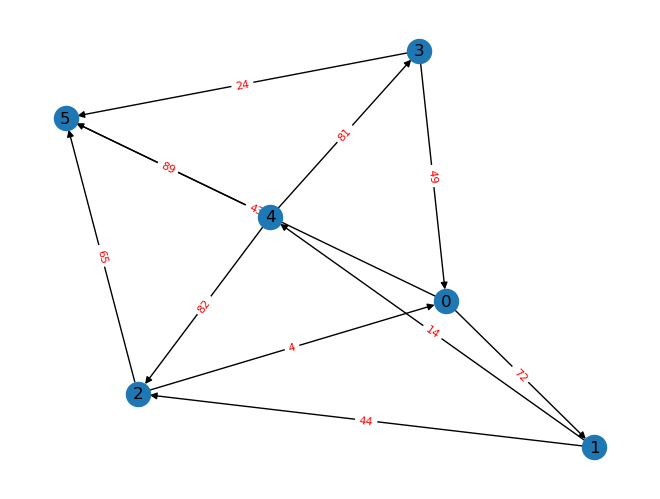

In [14]:
# Directed graphs

import numpy as np

nodes = []
for i in range(12):
    nodes.append(list(np.random.choice(list(range(0,6)),2,replace='False')))

rand_values = [np.random.randint(0,100) for _ in nodes]

# Create the nested dictionary
adjacency_list = {tuple(node): {'weight': rand_val} for node, rand_val in zip(nodes, rand_values)}

D = nx.DiGraph(nodes)
nx.set_edge_attributes(D, adjacency_list)


edge_weights = {(u, v): d['weight'] for u, v, d in D.edges(data=True)}
print(edge_weights)

pos = nx.spring_layout(D)

nx.draw(D, pos, with_labels='True')
nx.draw_networkx_edge_labels(D, pos, edge_labels=edge_weights, font_size=8, font_color='red')

## Larger graphs

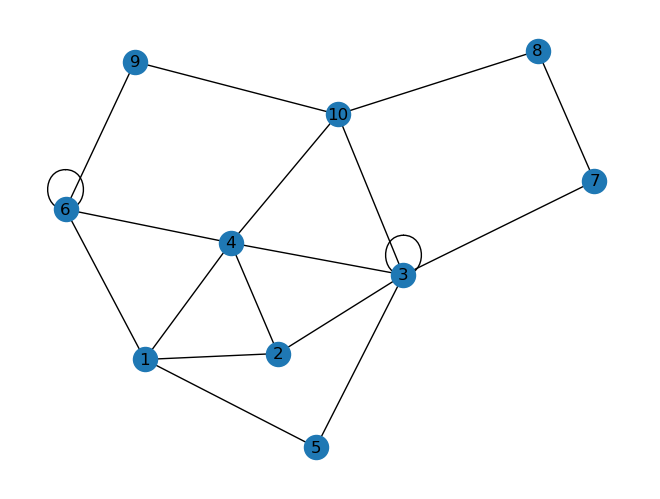

In [3]:
# Lets be more dingue
import random

G2 = nx.Graph()
nodes = [str(i) for i in range(1, 11)]
G2.add_nodes_from(nodes)

num_edges=len(nodes)*2
edges_indices=[]
for i in range(num_edges):
    p1=random.sample(nodes,k=1) # This is to allow for self directed egdes
    p2=random.sample(nodes,k=1)
    edges_indices.append((p1[0],p2[0]))
G2.add_edges_from(edges_indices)

nx.draw(G2, with_labels='True')

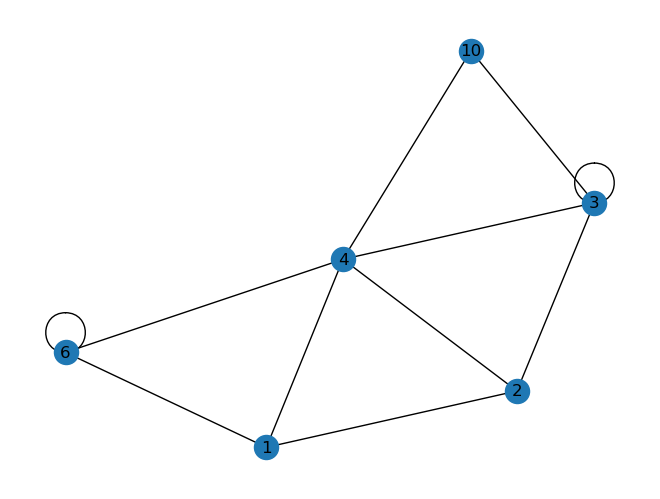

In [7]:
# Creates a subgraph of G
G2_sub = nx.subgraph(G2, ['1','2','3','4','6','10'])
nx.draw(G2_sub, with_labels='True')

### Reading in data and creating graphs of them

In [17]:
import pandas as pd

file_path = '/Users/inuit/Documents/Gitrepos/GraphTheory/Data/Districts of Gujarat.xlsx'

# Use pandas to read the Excel file
sheet_name = 'Sheet3' 
# Use pandas to read the specified sheet from the Excel file
df = pd.read_excel(file_path, sheet_name=sheet_name)
df.head(10)

Districts  Ahmedabad  Amreli  Anand  Aravalli  Banaskantha  Bharuch  \
0       Ahmedabad          0       0      1         0            0        0   
1          Amreli          0       0      0         0            0        0   
2           Anand          1       0      0         0            0        1   
3        Aravalli          0       0      0         0            0        0   
4     Banaskantha          0       0      0         0            0        0   
5         Bharuch          0       0      1         0            0        0   
6       Bhavnagar          1       1      0         0            0        0   
7           Botad          1       1      0         0            0        0   
8  Chhota Udaipur          0       0      0         0            0        0   
9           Dahod          0       0      0         0            0        0   

   Bhavnagar  Botad  Chhota Udaipur  ...  Panchmahal  Patan  Porbandar  \
0          1      1               0  ...           0      0          0   
1          1      1               0  ...           0      0          0   
2          0      0               0  ...           0      0          0   
3          0      0               0  ...           0      0          0   
4          0      0               0  ...           0      1          0   
5          0      0               0  ...           0      0          0   
6          0      1               0  ...           0      0          0   
7          1      0               0  ...           0      0          0   
8          0      0               0  ...           1      0          0   
9          0      0               1  ...           1      0          0   

   Rajkot  Sabarkantha  Surat  Surendranagar  Tapi  Vadodara  Valsad  
0       0            0      0              1     0         0       0  
1       1            0      0              0     0         0       0  
2       0            0      0              0     0         1       0  
3       0            1      0              0     0         0       0  
4       0            1      0              0     0         0       0  
5       0            0      1              0     0         1       0  
6       0            0      0              0     0         0       0  
7       1            0      0              1     0         0       0  
8       0            0      0              0     0         1       0  
9       0            0      0              0     0         0       0  

[10 rows x 34 columns]

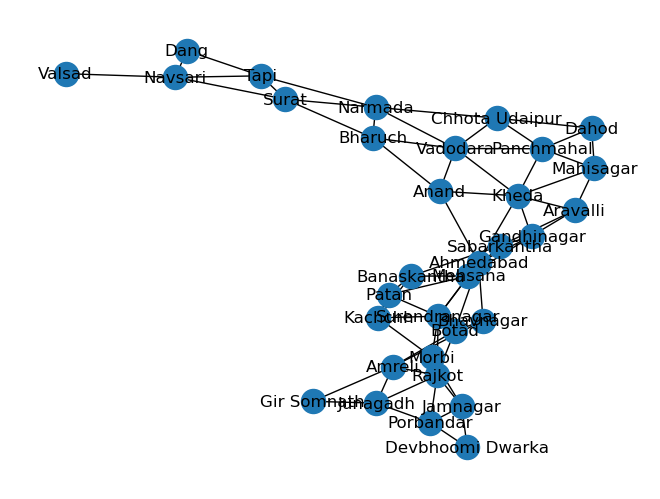

In [18]:
# Put the data into a graph
G3 = nx.Graph()

values = []

for label, value in df.items():
    values.append(df[label].values)

names = values.pop(0) # Names of districts are in first element

assert(len(values) == len(names))

edges = []

# This makes a the edge pairing if 1
for indice, i in enumerate(names):
    pairs = [(i, name) for value, name in zip(values[indice], names) if value == 1]
    edges.append(pairs)
    
for e in edges:
    G3.add_edges_from(e)
    
nx.draw(G3, with_labels='True')

In [19]:
# Matches with data
G3.adj['Tapi'], G3.degree['Tapi']

(AtlasView({'Dang': {}, 'Narmada': {}, 'Navsari': {}, 'Surat': {}}), 4)

In [20]:
# Save graph to file

import pickle

# save graph object to file, use binary
pickle.dump(G3, open('../Data/Districts_of_Gujarat.pickle', 'wb'))

# load graph object from file
G = pickle.load(open('../Data/Districts_of_Gujarat.pickle', 'rb'))

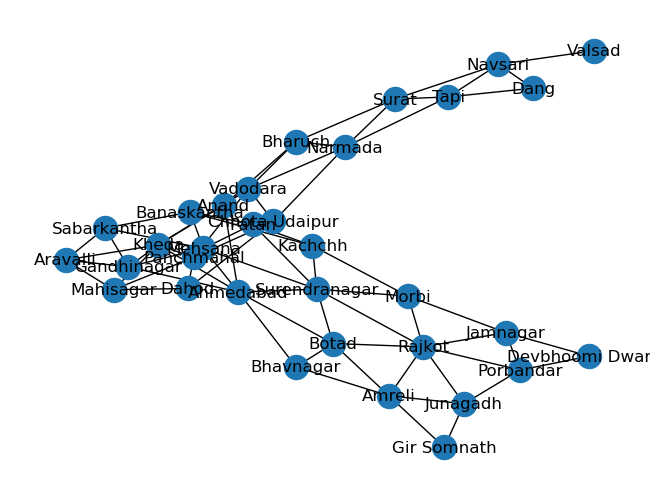

In [21]:
nx.draw(G, with_labels='True')

## What are the jobs we networkx can do for us?

- Shortest ways?
- Coloring?
- Optimize 
  - Transversion plan (e.g. Metro)
  - Edge construction
  - Create subgraphs
- ...

Many things.

---------
Next I will try to extend the graph with node- and edge attributes. 
Once that is done I will bother a good visualization and then start to apply alg. for optimization.

That **Follows in Notebook 2**

---------